In [252]:
#Decision Tree. 
#You will use this classification algorithm to build a model from historical data of patients, and their response to different medications. 
#Then you use the trained decision tree to predict the class of a unknown patient, #or to find a proper drug for a new patient.
#you can use the training part of the dataset to build a decision tree, and then use it to predict the 
#class of a unknown patient, or to prescribe it to a new patient.
# You will have to grow your own decision tree.
# Imagine that you're a medical researcher compiling data for a study. You've already collected data about a set of patients all of whom suffered from the same illness. During their course of treatment, each patient responded to one of two medications. We call them drug A and drug B. Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness.
# During their course of treatment, each patient responded to one of two medications. We call them drug A and drug B.
#Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness 
#Feature sets of this dataset are age, gender, blood pressure, and cholesterol of our group of patients 
# Target is the drug that each patient responded to
# Calculate the significance of an attribute to see if it's an effective attribute or not.

In [253]:
#HOW TO BUILD A DECISION TREE LEARNING ALGORITHM.
# 1. Choose an attribute from your dataset
# 2. Calculate the significiance of attribute in splitting of data
# 3. Split data based on the value of the best attribute
# 4. Go to step 1 and repeat.

# Decision trees are built using recursive partitining to classify the data.Decision tree Algorthim chooses the most predictive feature to split the data.Determine which attribute is the best or more predictive  to split data based on the feature.
# Predictiveness is based on decrease in impurity of nodes. The Algorithim is looking for the best feature to decrease the impurity after splitting them up based on features
# Impurity of nodes is calculated by entropy of data in the node. So, what is entropy? Entropy is the amount of information disorder or the amount of randomness in the data. The entropy in the node depends on how much random data is in that node and is calculated for each node. In decision trees, we're looking for trees that have the smallest entropy in their nodes. The entropy is used to calculate the homogeneity of the samples in that node. If the samples are completely homogeneous, the entropy is zero and if the samples are equally divided it has an entropy of one.
# We should go through all the attributes and calculate the entropy after the split and then choose the best attribute. 
#  Information gain is the information that can increase the level of certainty after splitting. It is the entropy of a tree before the split minus the weighted entropy after the split by an attribute. We can think of information gain and entropy as opposites. As entropy or the amount of randomness decreases, the information gain or amount of certainty increases and vice versa. So, constructing a decision tree is all about finding attributes that return the highest information gain. 

In [254]:
#IMPORT THE REQUIRED LIBRARIES
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [255]:
#Pre-processing
#Using my_data as the Drug.csv data read by pandas, declare the following variables:

#X as the Feature Matrix (data of my_data)
#y as the response vector (target)
#Remove the column containing the target name since it doesn't contain numeric values.

In [256]:
#OR USE THE URL of the CSV file given in GitHub.
# The sample is a bnary classifier and we can predict the class of an unknown patient.(Which drug to prescribe to a new patient)
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv"
my_data = pd.read_csv(url, delimiter=",")
my_data[0:5]
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [257]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [258]:
# As you may figure out, some features in this dataset are categorical such as Sex or BP. 
#Unfortunately, Sklearn Decision Trees do not handle categorical variables. 
#But still we can convert these features to numerical values. pandas.get_dummies() Convert categorical variable into dummy/indicator variables.

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [259]:
#Setting up the Decision Tree
#We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
#Now train_test_split will return 4 different parameters. We will name them:
#X_trainset, X_testset, y_trainset, y_testset

#The train_test_split will need the parameters:
#X, y, test_size=0.3, and random_state=3.

#The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [190]:
#test_sizefloat or int, default=None
#If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

#train_sizefloat or int, default=None
#If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size

#random_stateint or RandomState instance, default=None
#Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

In [205]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.40, random_state=5)

In [206]:
X_trainset

array([[40, 0, 1, 1, 11.349],
       [41, 0, 1, 1, 18.739],
       [32, 1, 0, 1, 9.445],
       [36, 1, 1, 1, 11.424000000000001],
       [61, 0, 1, 0, 18.043],
       [20, 1, 0, 1, 35.639],
       [69, 1, 1, 0, 15.478],
       [38, 0, 0, 1, 11.325999999999999],
       [51, 0, 1, 1, 23.003],
       [23, 1, 0, 0, 8.011000000000001],
       [64, 1, 2, 0, 7.761],
       [47, 0, 2, 1, 6.683],
       [72, 1, 1, 0, 16.31],
       [39, 1, 2, 0, 15.969000000000001],
       [74, 0, 1, 0, 20.941999999999997],
       [49, 1, 0, 1, 8.7],
       [70, 0, 2, 0, 20.489],
       [24, 0, 2, 0, 10.605],
       [28, 0, 1, 0, 19.796],
       [57, 1, 1, 1, 19.128],
       [46, 1, 2, 1, 7.285],
       [70, 1, 0, 0, 13.967],
       [32, 0, 1, 1, 10.84],
       [29, 0, 0, 0, 29.45],
       [56, 0, 0, 0, 25.395],
       [37, 0, 0, 1, 23.090999999999998],
       [45, 1, 1, 0, 17.951],
       [61, 1, 2, 0, 9.443],
       [38, 0, 1, 1, 29.875],
       [35, 1, 2, 1, 7.845],
       [18, 0, 0, 1, 24.276],
       [62,

In [207]:
y_testset.count()

80

In [250]:
# MODELING

#We will first create an instance of the DecisionTreeClassifier called drugTree.
#Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.
#Entropy is the amount of information disorder or the amount of randomness in the data. 
#The entropy in the node depends on how much random data is in that node and is calculated for each node. 
#In decision trees, we're looking for trees that have the smallest entropy in their nodes.
#The entropy is used to calculate the homogeneity of the samples in that node. 
#If the samples are completely homogeneous, the entropy is zero and if the samples are equally divided it has an entropy of one.

# the method uses recursive partitioning to split the training records into segments by minimizing the impurity at each step. 
#Impurity of nodes is calculated by entropy of data in the node. 
#So, what is entropy? Entropy is the amount of information disorder or the amount of randomness in the data. 
#The entropy in the node depends on how much random data is in that node and is calculated for each node. 
#In decision trees, we're looking for trees that have the smallest entropy in their nodes. The entropy is used to calculate the homogeneity of the samples in that node. If the samples are completely homogeneous, the entropy is zero and if the samples are equally divided it has an entropy of one.
#Entropy is the amount of information disorder or the amount of randomness in the data. 
#The entropy in the node depends on how much random data is in that node and is calculated for each node. 
#In decision trees, we're looking for trees that have the smallest entropy in their nodes. 
#The entropy is used to calculate the homogeneity of the samples in that node. 
#If the samples are completely homogeneous, the entropy is zero and if the samples are equally divided it has an entropy of one.

# max_depth:int, default=None
#The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

#criterion{“gini”, “entropy”}, default=”gini”
#The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.


In [251]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
drugTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [235]:
#Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [236]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [237]:
#Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [245]:
predTree = drugTree.predict(X_testset)
predTree 

array(['drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugY', 'drugY', 'drugY', 'drugA', 'drugA',
       'drugB', 'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugC', 'drugX', 'drugB', 'drugY', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugX', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA',
       'drugY', 'drugC', 'drugA', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugB', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugC', 'drugY'], dtype=object)

In [247]:
y_testset

119    drugY
77     drugY
148    drugX
149    drugC
154    drugY
       ...  
89     drugY
15     drugY
177    drugY
10     drugC
96     drugY
Name: Drug, Length: 80, dtype: object

In [248]:
#Accuracy classification score computes subset accuracy: the set of labels predicted 
#for a sample must exactly match the corresponding set of labels in y_true.
#In multilabel classification, the function returns the subset accuracy. 
#If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [249]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Decision Trees's Accuracy:  0.9875


In [ ]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

In [232]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


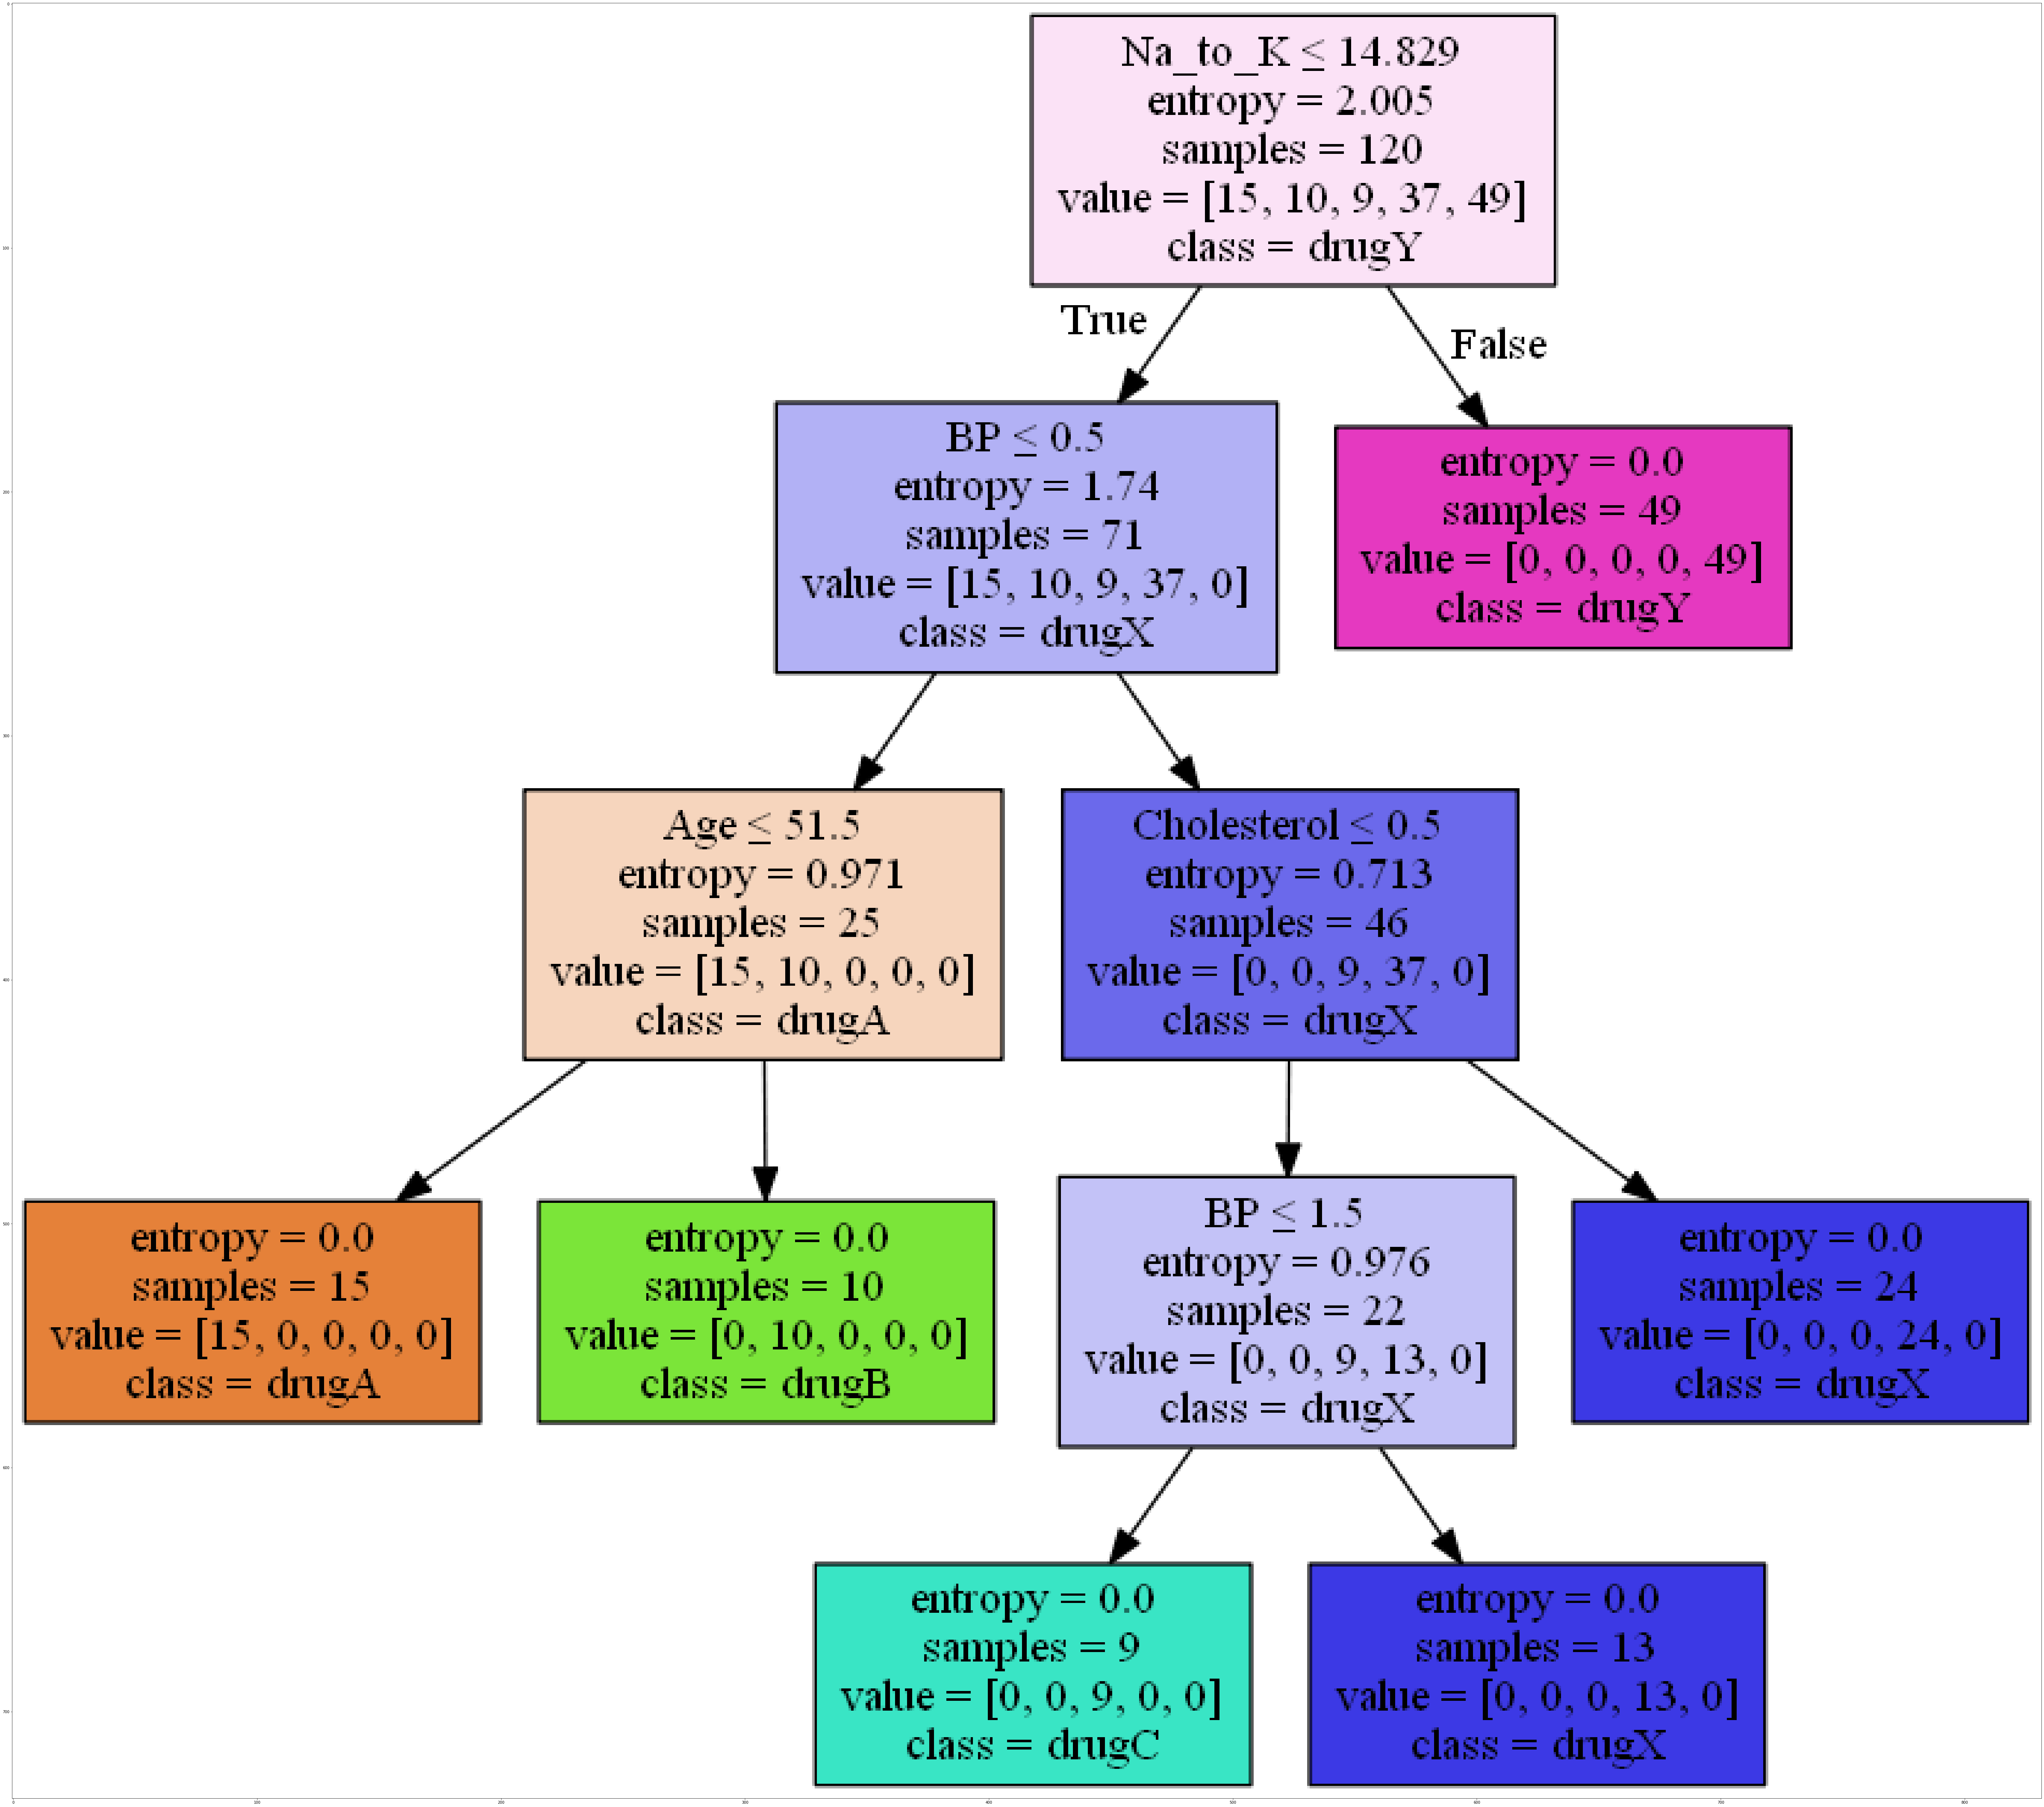

In [233]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')